In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from te_arcolanche import *

import csv

from multiprocess import Pool,cpu_count
from itertools import product

In [7]:
#No need to run this again. The output is saved in conflict_positions.

#misc_funcs.conflict_position("battles")

In [13]:
#No need to run this again. The output is saved in event_mappings.

#misc_funcs.conflict_event_polygon_mapping(40,0,"battles",20)

Finding event to polygon mapping!
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Done!


In [6]:
#No need to run this again. The output is saved in 80/160/320/640.

#misc_funcs.single_tile_events(640,0,"battles")

In [2]:
#No need to run this again. The output is saved in FG_time_series.

dx = 640
gridix = 0
ts = misc_funcs.time_series_all_polygons(1,dx,gridix,"battles")
ts.to_csv(f"generated_data/battles/gridix_{gridix}/FG_time_series/time_series_1_{str(dx)}.csv" , index=False)

In [2]:
ts = misc_funcs.time_series_all_polygons(64,320,"battles")
a,b = misc_funcs.avalanche_creation_fast_st(ts,64,320,"battles")

Creating time bins!
Done!


/home/niraj/armed_conflict/misc_funcs.py:261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  neighbors_arr = np.array(neighbors_list)


In [3]:
len(a)

4356

In [2]:
a,b,c = misc_funcs.avalanche_creation_fast_te(64,80,"battles","data")

Calculating transfer entropy between tiles!
Shuffle Number: 0
Shuffle Number: 10
Shuffle Number: 20
Shuffle Number: 30
Shuffle Number: 40
Shuffle Number: 50
Done!
Calculating self loop entropies!
Shuffle Number: 0
Shuffle Number: 10
Shuffle Number: 20
Shuffle Number: 30
Shuffle Number: 40
Shuffle Number: 50


In [3]:
len(a)

4052

# Generating avalanches

In [3]:
def loop_wrapper_st(args):
    dx , time = args
    ts = misc_funcs.time_series_all_polygons(time,dx,"battles")
    a,b = misc_funcs.avalanche_creation_fast_st(ts,time,dx,"battles")
    return a

In [2]:
def loop_wrapper_te(args):
    dx , time = args
    a,b,c = misc_funcs.avalanche_creation_fast_te(time,dx,"battles","data")
    return a

In [5]:
with Pool(18) as pool:
    output = list(pool.map(loop_wrapper_te , product([80,160,320,640],[2,4,8,16,32,64,128,256,512])))

Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Shuffle Number: 0
Shuffle Number: 0
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Shuffle Number: 0
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculating transfer entropy between tiles!
Shuffle Number: 0
Calculat

In [6]:
dx_time = list(product([80,160,320,640],[2,4,8,16,32,64,128,256,512]))

In [7]:
for i in range(len(dx_time)):
    ava_list = output[i]
    
    with open(f"avalanches/battles/te/te_ava_box_{dx_time[i][1]}_{dx_time[i][0]}.csv","w") as f:
        wr = csv.writer(f)
        wr.writerows(output[i])

## Box to Event ava conversion

In [17]:
type_of_algo = "st"

def box_to_event(args):
    dx , time = args
    
    box_path = f"avalanches/battles/{type_of_algo}/{type_of_algo}_ava_box_{str(time)}_{str(dx)}.csv"
    box_ava = misc_funcs.extract_box_ava_from_file(box_path)
    
    ts_FG = pd.read_csv(f"generated_data/battles/FG_time_series/time_series_1_{str(dx)}.csv")
    data_bin = misc_funcs.data_bin_extracter(ts_FG,time)
    
    event_ava = misc_funcs.boxAva_to_eventAva(box_ava,data_bin)
    
    return event_ava

In [18]:
with Pool(18) as pool:
    output = list(pool.map(box_to_event , product([80,160,320,640],[2,4,8,16,32,64,128,256,512])))

In [19]:
dx_time = list(product([80,160,320,640],[2,4,8,16,32,64,128,256,512]))

In [20]:
for i in range(len(dx_time)):
    ava_list = output[i]
    
    with open(f"avalanches/battles/{type_of_algo}/{type_of_algo}_ava_event_{dx_time[i][1]}_{dx_time[i][0]}.csv","w") as f:
        wr = csv.writer(f)
        wr.writerows(output[i])

## Analysis

In [27]:
time = 64
dx = 320
type_of_algo = "te"
conflict_type = "battles"

In [28]:
event_path = f"avalanches/battles/{type_of_algo}/{type_of_algo}_ava_event_{str(time)}_{str(dx)}.csv"
avalanche_data = misc_funcs.ava_numbering(time,dx,conflict_type,event_path)

In [30]:
parameter_of_interest = input("f/r/du/s/di: " )

if(parameter_of_interest == "f"):
    dt = ava_parameter_functions.fatalities(avalanche_data) #For getting frequency distribution
    xlabel = "Fatalities"
elif(parameter_of_interest == "r"):
    dt = ava_parameter_functions.reports(avalanche_data) #For getting frequency distribution
    xlabel = "Reports"
elif(parameter_of_interest == "du"):
    dt = ava_parameter_functions.duration(avalanche_data) #For getting frequency distribution
    xlabel = "Duration"
elif(parameter_of_interest == "s"):
    dt = ava_parameter_functions.sites(avalanche_data) #For getting frequency distribution
    xlabel = "Sites"
elif(parameter_of_interest == "di"):
    diameter_type = input("centers(c)/events(e): ")
    cen = []
    for i in range(len(polygons)):
        centroid = Point(polygons["geometry"].iloc[i].centroid.coords)
        cen.append(centroid)
    centers = gpd.GeoSeries(cen)
    if(diameter_type == "c"):
        xlabel = "Diameter (Using Centers)"
        dt = ava_parameter_functions.diameter_centers(avalanche_data,centers)
    elif(diameter_type == "e"):
        xlabel = "Diameter (Using event distance)"
        dt = ava_parameter_functions.diameter_events(avalanche_data,centers,data)

f/r/du/s/di: f


Text(0.5, 1.0, '64,320')

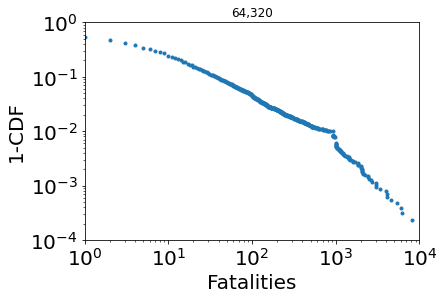

In [31]:
#For discrete quantities

dt1 = np.bincount(dt)      #For getting frequency distribution
dt1 = dt1/dt1.sum()             #For Normalization
dt1[dt1 == 0] = np.nan
dt1 = pd.DataFrame(dt1)
dt1 = dt1.cumsum(skipna=True)           #To get commulaative distribution
dt1 = (1-dt1)                    #To get complimentary commulative distribution
dt1 = dt1[0]

plt.scatter(np.arange(1 , dt1.size-1) , dt1[1:-1] , marker='.')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([10**-4 , 10**0])
ax.set_xlim([10**0 , 10**4])

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.xlabel(xlabel , fontsize=20)
plt.ylabel("1-CDF" , fontsize=20)

plt.title(f"{str(time)},{str(dx)}")

#plt.savefig(f"{conflict_type}_{parameter_of_interest}_{str(dx)}_{str(time)}.png")

#plt.xscale("linear")
#plt.yscale("linear")
#plt.xlim((0,max(dt)))

(1.7346061870018716, 9, 0.025676316103683594)

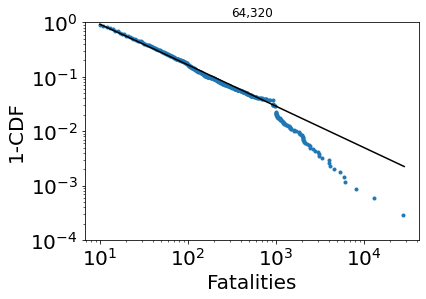

In [32]:
alpha,xmin,ks = power_law_func.power_law_fitting_discrete(time, dx, dt, xlabel , "y" , "n")
#plt.ylim([0,1])
alpha,xmin,ks

In [ ]:
#For continous quantities

dt1 = dt[dt != 0]
dt1 = np.unique(dt1)
dt1 = np.array(dt1)
x = np.sort(dt1)
y = 1 - (np.arange(len(dt1)) / float(len(dt1)))

#plt.scatter(np.log(np.arange(dt.size)) , np.log(dt) , marker='.')

plt.scatter(x , y , marker='.')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([10**-4 , 10**0])
#ax.set_xlim([10**0 , 10**4])

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.xlabel(xlabel , fontsize=20)
plt.ylabel("1-CDF" , fontsize=20)

plt.title(f"{str(time)},{str(dx)}")

#plt.savefig(f"{conflict_type}_{parameter_of_interest}_{str(dx)}_{str(time)}.png")

In [ ]:
power_law_func.power_law_fitting_continuous(time , dx , dt,xlabel , "y" , "n")
#plt.ylim([0,1])